In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from bs4 import BeautifulSoup
import requests
from urllib.request import urlopen
from sklearn.preprocessing import MinMaxScaler


import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../input/2012_qb_weeks1_8.csv')
df1=pd.read_csv('../input/2012_qb_weeks_9_16.csv')
df3 = pd.read_csv('../input/2012_qb_week17.csv')

In [3]:
raw_qb_2012 = pd.concat([df,df1], axis=0)
raw_qb_2012 = pd.concat([raw_qb_2012, df3], axis=0)
raw_qb_2012.drop('Rk', axis =1, inplace = True)
raw_qb_2012.shape

(629, 18)

In [4]:
raw_qb_2012.head()

,Player,Pos,Week,Team,Opp,Comp,Att,Pct,Yds,Yds/Att,TD,Int,QB Rating,Att.1,Yds.1,Yds/Att.1,TD.1,Fantasy Points
0,Matt Ryan,QB,1,ATL,KC,23,31,74,299,10,3,0,136,3,25,8,1,32.46
1,Robert Griffin III,QB,1,WAS,NO,19,26,73,320,12,2,0,140,9,42,5,0,25.00
2,Tony Romo,QB,1,DAL,NYG,22,29,76,307,11,3,1,130,5,12,2,0,23.48
3,Aaron Rodgers,QB,1,GB,SF,30,44,68,303,7,2,1,93,5,27,5,0,22.82
4,Drew Brees,QB,1,NO,WAS,24,52,46,339,7,3,2,71,0,0,0,0,21.56


In [5]:
raw_qb_2012 = raw_qb_2012.rename(columns={'Att.1':'rush_att',
                       'Yds.1':'rush_yds',
                       'Yds/Att.1':'rush_yd/att',
                       'TD.1':'rush_td'})

In [6]:
raw_qb_2012=raw_qb_2012.rename(columns={'Fantasy Points':'points'})

In [7]:
qbs = (player for player in raw_qb_2012['Player'].unique())

In [8]:
current = qbs.__next__()

'Matt Ryan'

In [9]:
team_stats = raw_qb_2012.groupby(['Player','Week','Opp']).sum()

In [12]:
y=team_stats['points'].values

In [9]:
team_stats.drop('Fantasy Points', axis =1, inplace = True)

In [13]:
# Define a dataframe to contain the current year averages of all 2012 QBs
def create_current_dataframe(df):
    columns = []
    for col in df.columns:
        columns.append('avg_{}'.format(col.lower()))
    new_df = pd.DataFrame(columns=columns, index =df.index)
    return new_df

In [14]:
qb_current_2012 = create_current_dataframe(team_stats)

In [31]:
# Populate current dataframe with current year averages of players
# DO NOT CHANGE!!!!!!
for col in team_stats:  # Iterate through every attribute in the team_stats dataframe
    points=[]  # Create an empty list to hold the season average of the current attribute
    for player in team_stats.index.levels[0]:  # Iterate through every player in the team_stats df
        total =[] # create an empty list to hold the weekly attributes value
        for week in team_stats.loc[player].index: # Iterate throough every week for the current player
            total.append(team_stats.loc[player].loc[week][col]) # Add player's value for the current week's attribute to the total list
            points.append(np.mean(total))  # Add the average of the total list to the season average list
    qb_current_2012['avg_{}'.format(col.lower())] = points # Insert season average list for current attribute into the current stats dataframe
    

In [32]:
qb_current_2012['season']=2012

In [33]:
def_rush_rank = {'SEA': 1,
                'SF': 2,
                'CHI': 3,
                'DEN': 4,
                 'ATL': 5,
                 'PIT': 6,
                 'MIA':7,
                 'CIN': 8,
                 'NE': 9,
                 'HOU': 10,
                 'GB': 11,
                 'BAL': 12,
                 'NYG': 13,
                 'LAR':14,
                 'MIN': 15,
                 'LAC': 16,
                 'ARI': 17,
                 'CAR': 18,
                 'CLE': 19,
                 'NYJ': 20,
                 'IND': 21,
                 'WAS': 22,
                 'TB': 23,
                 'DAL':24,
                 'KC': 25,
                 'BUF': 26,
                 'DET': 27,
                 'OAK': 28,
                 'JAX': 29,
                 'PHI':30,
                 'NO':31,
                 'TEN': 32
                }

In [34]:
def_pass_rank = {'SEA': 6,
                'SF': 4,
                'CHI': 8,
                'DEN': 3,
                 'ATL': 23,
                 'PIT': 1,
                 'MIA':27,
                 'CIN': 7,
                 'NE': 29,
                 'HOU': 16,
                 'GB': 11,
                 'BAL': 17,
                 'NYG': 28,
                 'LAR':15,
                 'MIN': 24,
                 'LAC': 18,
                 'ARI': 5,
                 'CAR': 13,
                 'CLE': 25,
                 'NYJ': 2,
                 'IND': 21,
                 'WAS': 30,
                 'TB': 32,
                 'DAL':19,
                 'KC': 12,
                 'BUF': 10,
                 'DET': 14,
                 'OAK': 20,
                 'JAX': 22,
                 'PHI':9,
                 'NO':31,
                 'TEN': 26
                }

In [35]:
defense = []
for player in qb_current_2012.index.levels[0]:
    for row in qb_current_2012.loc[player].index:
        defense.append(row[1])
qb_current_2012['opponent']=defense

qb_current_2012['def_ru_rk'] = list(map(lambda x: def_rush_rank[x], qb_current_2012['opponent']))
qb_current_2012['def_pass_rk'] = list(map(lambda x: def_pass_rank[x], qb_current_2012['opponent']))
qb_current_2012.drop('opponent', axis=1, inplace=True)

In [36]:
defense = []
for player in qb_current_2012.index.levels[0]:
    for row in qb_current_2012.loc[player].index:
        defense.append(row[0])
qb_current_2012['week']=defense


In [47]:
data=[]
for player in qb_current_2012.index.levels[0]:
    data.append( qb_current_2012.loc[player]['avg_att'].mean())
    

In [ ]:
sns.regplot()

In [33]:
qb_current_2012.head()

avg_comp    avg_att  avg_pct     avg_yds  avg_yds/att  \
Player        Week Opp                                                          
Aaron Rodgers 1    SF      30.00  44.000000     68.0  303.000000     7.000000   
              2    CHI     26.00  38.000000     68.5  261.000000     7.000000   
              3    SEA     26.00  38.333333     68.0  248.333333     6.666667   
              4    NO      27.25  39.000000     70.0  266.000000     7.000000   
              5    IND     25.80  37.600000     68.6  259.800000     7.000000   

                        avg_td   avg_int  avg_qb rating  avg_rush_att  \
Player        Week Opp                                                  
Aaron Rodgers 1    SF     2.00  1.000000      93.000000      5.000000   
              2    CHI    1.50  1.000000      89.000000      4.000000   
              3    SEA    1.00  0.666667      86.333333      3.333333   
              4    NO     1.75  0.750000      94.750000      3.750000   
              5    IND    2.00  0.800000      96.400000      4.000000   

                        avg_rush_yds  avg_rush_yd/att  avg_rush_td  \
Player        Week Opp                                               
Aaron Rodgers 1    SF      27.000000             5.00          0.0   
              2    CHI     10.500000             1.50          0.0   
              3    SEA     12.666667             4.00          0.0   
              4    NO      12.750000             3.75          0.0   
              5    IND     21.600000             5.20          0.0   

                        avg_fantasy points  season  
Player        Week Opp                              
Aaron Rodgers 1    SF            22.820000    2012  
              2    CHI           16.490000    2012  
              3    SEA           14.533333    2012  
              4    NO            17.915000    2012  
              5    IND           19.352000    2012

In [34]:
qb_current_2012= qb_current_2012.rename(columns={'avg_fantasy points': 'avg_points'})

In [37]:
opp = qb_current_2012.groupby('opponent').sum().sort_values(by='avg_points', ascending =True)

In [38]:
opp.head()

,avg_comp,avg_att,avg_pct,avg_yds,avg_yds/att,avg_td,avg_int,avg_qb rating,avg_rush_att,avg_rush_yds,avg_rush_yd/att,avg_rush_td,avg_points,season,def_ru_rk,def_pass_rk
opponent,,,,,,,,,,,,,,,,
IND,329.045202,539.731890,1084.929401,3797.289069,129.277201,21.274062,12.340079,1523.866883,40.377579,115.923395,45.551389,0.575000,222.639386,38228,399,399
SF,315.929865,514.017599,1005.400777,3617.958786,114.482579,21.763725,14.379426,1378.691003,42.022733,148.859413,49.381030,1.258247,223.948288,38228,38,76
BAL,358.367251,585.912771,1188.397849,4131.674799,145.688072,19.901336,20.382801,1611.812438,43.668758,158.677783,48.570782,2.022650,225.157034,44264,264,374
GB,324.684232,546.734620,961.090984,3728.952502,112.031956,21.287354,15.552381,1320.902552,44.532384,190.972806,73.356339,1.558883,227.315777,38228,209,209
CHI,355.287544,573.280335,1169.573934,3892.486751,128.583282,20.038900,17.832330,1549.753784,51.801442,218.914261,59.017272,1.679737,228.026193,38228,57,152


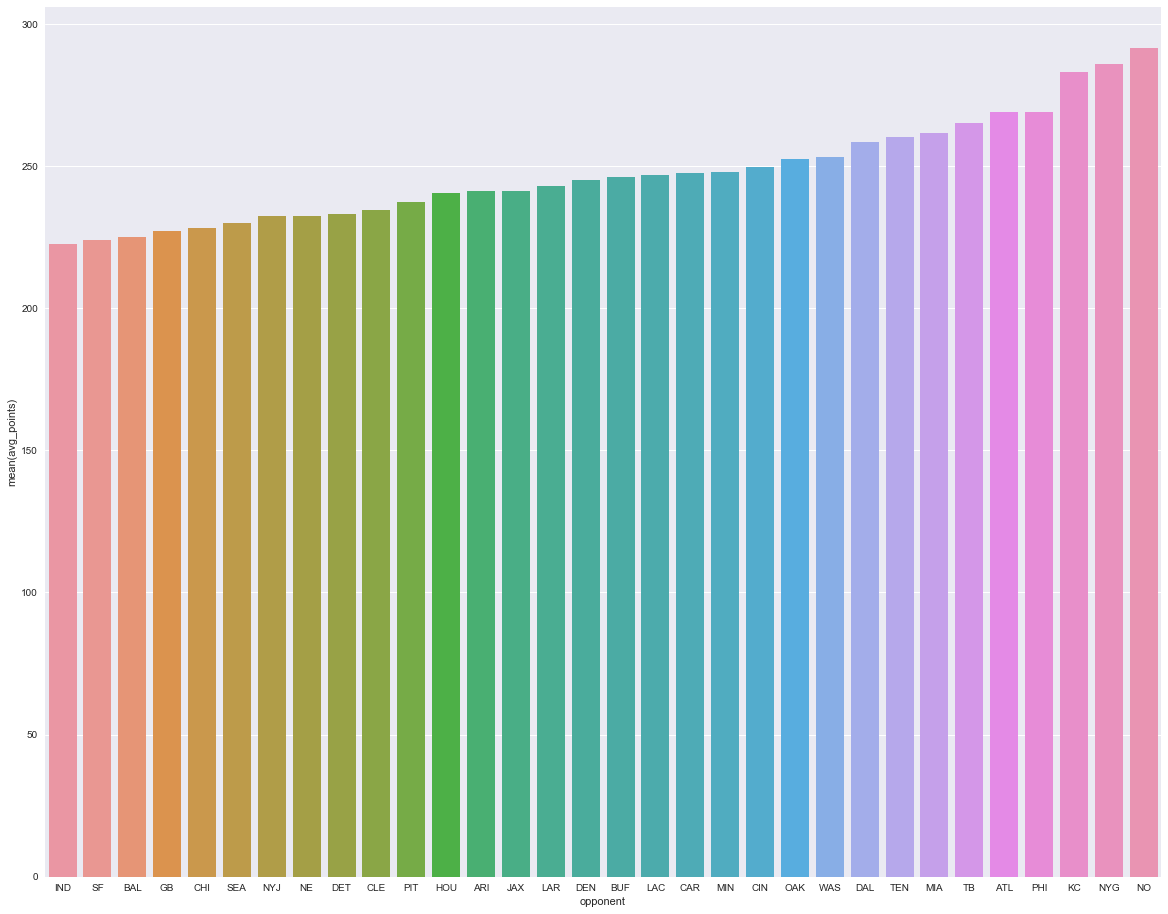

In [39]:
ax = plt.subplots(figsize=(20,16))
sns.barplot(x=opp.index, y='avg_points', data=opp)


In [56]:
weekly = qb_current_2012.groupby('Week').mean()

In [57]:
weekly

,avg_comp,avg_att,avg_pct,avg_yds,avg_yds/att,avg_td,avg_int,avg_qb rating,avg_rush_att,avg_rush_yds,avg_rush_yd/att,avg_rush_td,avg_points,season,def_ru_rk,def_pass_rk
Week,,,,,,,,,,,,,,,,
1,18.076923,28.820513,57.487179,211.512821,6.846154,1.230769,0.897436,81.435897,2.794872,8.000000,2.538462,0.051282,12.550256,2012.0,15.820513,16.358974
2,19.257143,30.671429,60.828571,227.457143,7.314286,1.371429,0.885714,87.100000,2.971429,10.528571,2.942857,0.128571,14.326857,2012.0,16.057143,15.942857
3,17.863248,28.717949,56.974359,209.230769,6.837607,1.273504,0.735043,82.230769,2.581197,9.863248,2.888889,0.102564,13.305983,2012.0,16.487179,16.794872
4,17.407895,27.848684,54.552632,203.118421,6.414474,1.190789,0.756579,78.348684,2.546053,9.822368,2.868421,0.131579,12.884605,2012.0,16.447368,16.394737
5,16.214414,26.252703,54.870270,191.136937,6.713063,1.167568,0.743243,78.027027,2.462162,10.159459,2.905405,0.122072,12.247009,2012.0,16.108108,16.513514
6,18.467172,29.791919,57.707071,214.112626,6.898485,1.219192,0.849495,79.729293,2.526768,10.428788,3.031818,0.114141,13.172232,2012.0,16.000000,16.363636
7,17.743779,28.930876,57.088326,206.763441,6.587250,1.187404,0.765438,78.946083,2.523502,10.745469,3.119355,0.121966,12.998080,2012.0,17.064516,17.322581
8,17.790136,28.908503,56.040476,205.748469,7.029082,1.160204,0.789626,77.693878,2.629762,9.789286,2.822789,0.101701,12.564020,2012.0,16.714286,17.285714
9,19.420878,31.375806,57.468049,224.553290,6.622184,1.304442,0.835829,80.110484,2.643152,10.762058,2.985753,0.102279,13.871881,2012.0,18.193548,17.354839


In [37]:
#A function that will covert a time series database into a supervised learning database

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
            cols.append(df.shift(i))
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [72]:
qb_current_2012.head()

avg_comp    avg_att  avg_pct     avg_yds  avg_yds/att  \
Player        Week Opp                                                          
Aaron Rodgers 1    SF      30.00  44.000000     68.0  303.000000     7.000000   
              2    CHI     26.00  38.000000     68.5  261.000000     7.000000   
              3    SEA     26.00  38.333333     68.0  248.333333     6.666667   
              4    NO      27.25  39.000000     70.0  266.000000     7.000000   
              5    IND     25.80  37.600000     68.6  259.800000     7.000000   

                        avg_td   avg_int  avg_qb rating  avg_rush_att  \
Player        Week Opp                                                  
Aaron Rodgers 1    SF     2.00  1.000000      93.000000      5.000000   
              2    CHI    1.50  1.000000      89.000000      4.000000   
              3    SEA    1.00  0.666667      86.333333      3.333333   
              4    NO     1.75  0.750000      94.750000      3.750000   
              5    IND    2.00  0.800000      96.400000      4.000000   

                        avg_rush_yds  avg_rush_yd/att  avg_rush_td  \
Player        Week Opp                                               
Aaron Rodgers 1    SF      27.000000             5.00          0.0   
              2    CHI     10.500000             1.50          0.0   
              3    SEA     12.666667             4.00          0.0   
              4    NO      12.750000             3.75          0.0   
              5    IND     21.600000             5.20          0.0   

                        avg_fantasy points  
Player        Week Opp                      
Aaron Rodgers 1    SF            22.820000  
              2    CHI           16.490000  
              3    SEA           14.533333  
              4    NO            17.915000  
              5    IND           19.352000

In [38]:
df= qb_current_2012.astype('float32')



# scale data, reframe for supervised learning and drop target variable
scaler = MinMaxScaler(feature_range=(0,1))
scaled  = scaler.fit_transform(df)
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var8(t),var9(t),var10(t),var11(t),var12(t),var13(t),var14(t),var15(t),var16(t),var17(t)
1,0.937500,0.785714,0.680,0.838174,0.350000,0.666667,0.250000,0.588608,0.454545,0.437500,...,0.563291,0.363636,0.204637,0.184211,0.0,0.536564,0.0,0.064516,0.225806,0.0625
2,0.812500,0.678571,0.685,0.721992,0.350000,0.500000,0.250000,0.563291,0.363636,0.204637,...,0.546414,0.303030,0.235215,0.315789,0.0,0.479783,0.0,0.000000,0.161290,0.1250
3,0.812500,0.684524,0.680,0.686952,0.333333,0.333333,0.166667,0.546414,0.303030,0.235215,...,0.599684,0.340909,0.236391,0.302632,0.0,0.577916,0.0,0.967742,0.967742,0.1875
4,0.851562,0.696429,0.700,0.735823,0.350000,0.583333,0.187500,0.599684,0.340909,0.236391,...,0.610127,0.363636,0.361290,0.378947,0.0,0.619617,0.0,0.645161,0.645161,0.2500
5,0.806250,0.671429,0.686,0.718672,0.350000,0.666667,0.200000,0.610127,0.363636,0.361290,...,0.649789,0.333333,0.350470,0.412281,0.0,0.715709,0.0,0.290323,0.483871,0.3125


In [39]:
reframed.drop(reframed.columns[25], axis=1, inplace =True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var7(t),var8(t),var10(t),var11(t),var12(t),var13(t),var14(t),var15(t),var16(t),var17(t)
1,0.937500,0.785714,0.680,0.838174,0.350000,0.666667,0.250000,0.588608,0.454545,0.437500,...,0.250000,0.563291,0.204637,0.184211,0.0,0.536564,0.0,0.064516,0.225806,0.0625
2,0.812500,0.678571,0.685,0.721992,0.350000,0.500000,0.250000,0.563291,0.363636,0.204637,...,0.166667,0.546414,0.235215,0.315789,0.0,0.479783,0.0,0.000000,0.161290,0.1250
3,0.812500,0.684524,0.680,0.686952,0.333333,0.333333,0.166667,0.546414,0.303030,0.235215,...,0.187500,0.599684,0.236391,0.302632,0.0,0.577916,0.0,0.967742,0.967742,0.1875
4,0.851562,0.696429,0.700,0.735823,0.350000,0.583333,0.187500,0.599684,0.340909,0.236391,...,0.200000,0.610127,0.361290,0.378947,0.0,0.619617,0.0,0.645161,0.645161,0.2500
5,0.806250,0.671429,0.686,0.718672,0.350000,0.666667,0.200000,0.610127,0.363636,0.361290,...,0.166667,0.649789,0.350470,0.412281,0.0,0.715709,0.0,0.290323,0.483871,0.3125


In [40]:
reframed['def_rush_rk'] = qb_current_2012['def_ru_rk'].values[1:]

In [41]:
reframed['def_pass_rk'] = qb_current_2012['def_pass_rk'].values[1:]

In [42]:
for col in reframed.columns:
    print(col)

var1(t-1)
var2(t-1)
var3(t-1)
var4(t-1)
var5(t-1)
var6(t-1)
var7(t-1)
var8(t-1)
var9(t-1)
var10(t-1)
var11(t-1)
var12(t-1)
var13(t-1)
var14(t-1)
var15(t-1)
var16(t-1)
var17(t-1)
var1(t)
var2(t)
var3(t)
var4(t)
var5(t)
var6(t)
var7(t)
var8(t)
var10(t)
var11(t)
var12(t)
var13(t)
var14(t)
var15(t)
var16(t)
var17(t)
def_rush_rk
def_pass_rk


In [27]:
reframed[0:30]

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),def_rush_rk,def_pass_rk
1,0.937500,0.785714,0.680000,0.838174,0.350000,0.666667,0.250000,0.588608,0.454545,0.437500,...,0.350000,0.500000,0.250000,0.563291,0.363636,0.204637,0.184211,0.000000,3,8
2,0.812500,0.678571,0.685000,0.721992,0.350000,0.500000,0.250000,0.563291,0.363636,0.204637,...,0.333333,0.333333,0.166667,0.546414,0.303030,0.235215,0.315789,0.000000,1,6
3,0.812500,0.684524,0.680000,0.686952,0.333333,0.333333,0.166667,0.546414,0.303030,0.235215,...,0.350000,0.583333,0.187500,0.599684,0.340909,0.236391,0.302632,0.000000,31,31
4,0.851562,0.696429,0.700000,0.735823,0.350000,0.583333,0.187500,0.599684,0.340909,0.236391,...,0.350000,0.666667,0.200000,0.610127,0.363636,0.361290,0.378947,0.000000,21,21
5,0.806250,0.671429,0.686000,0.718672,0.350000,0.666667,0.200000,0.610127,0.363636,0.361290,...,0.366667,0.888889,0.166667,0.649789,0.333333,0.350470,0.412281,0.000000,10,16
6,0.796875,0.669643,0.680000,0.754726,0.366667,0.888889,0.166667,0.649789,0.333333,0.350470,...,0.378571,0.904762,0.142857,0.676311,0.311688,0.308468,0.368421,0.000000,14,15
7,0.816964,0.668367,0.698571,0.782059,0.378571,0.904762,0.142857,0.676311,0.311688,0.308468,...,0.362500,0.875000,0.125000,0.667722,0.306818,0.284022,0.342105,0.000000,29,22
8,0.800781,0.662946,0.690000,0.748617,0.362500,0.875000,0.125000,0.667722,0.306818,0.284022,...,0.361111,0.925926,0.138889,0.661744,0.353535,0.310484,0.339181,0.000000,17,5
9,0.760417,0.648810,0.665556,0.732442,0.361111,0.925926,0.138889,0.661744,0.353535,0.310484,...,0.370000,0.900000,0.150000,0.662658,0.327273,0.289315,0.331579,0.000000,27,14
10,0.743750,0.632143,0.669000,0.724481,0.370000,0.900000,0.150000,0.662658,0.327273,0.289315,...,0.377273,0.848485,0.159091,0.649597,0.322314,0.296371,0.344498,0.000000,13,28


In [43]:
X=reframed.values

In [44]:
len(X)

628

In [45]:
y=y[1:]


In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
yhat=lr.predict(X)
yhat[0:30]

array([ 12.60076771,  13.05940069,  24.27096358,  20.84587329,
        25.18356138,  22.00237492,  20.91355333,  20.55827657,
        20.80912786,  19.32569371,  18.34999294,  18.49189511,
        18.43832061,  22.58397229,  20.70456132,  12.51169033,
        18.23756995,  13.72740828,  10.57452989,  19.68478835,
        12.87024884,  11.09960829,  15.65459721,  13.5630116 ,
        11.00951237,  13.30532852,   9.31828871,   9.76016242,
         8.75577964,   6.19105416])

In [48]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_val = rmse(yhat, y)
print("RMSE error is: " + str(rmse_val))

RMSE error is: 5.28567329449


In [49]:
rmse_val/np.mean(yhat)

0.41921920633867582

In [50]:
type(actual)

NameError: name 'actual' is not defined

In [29]:
qb_current_2012=qb_current_2012[1:]

In [28]:
len(yhat)

628

In [51]:
qb_current_2012['predicted']=yhat

ValueError: Length of values does not match length of index

In [32]:
qb_current_2012[0:100]

avg_comp    avg_att     avg_pct     avg_yds  \
Player             Week Opp                                                 
Aaron Rodgers      2    CHI  26.000000  38.000000   68.500000  261.000000   
                   3    SEA  26.000000  38.333333   68.000000  248.333333   
                   4    NO   27.250000  39.000000   70.000000  266.000000   
                   5    IND  25.800000  37.600000   68.600000  259.800000   
                   6    HOU  25.500000  37.500000   68.000000  272.833333   
                   7    LAR  26.142857  37.428571   69.857143  282.714286   
                   8    JAX  25.625000  37.125000   69.000000  270.625000   
                   9    ARI  24.333333  36.333333   66.555556  264.777778   
                   11   DET  23.800000  35.400000   66.900000  261.900000   
                   12   NYG  22.909091  34.454545   65.909091  258.000000   
                   13   MIN  23.250000  34.500000   66.833333  260.333333   
                   14   DET  22.538462  33.692308   66.153846  253.615385   
                   15   CHI  22.571429  33.857143   66.000000  256.285714   
                   16   TEN  22.866667  34.133333   66.333333  262.000000   
                   17   MIN  23.187500  34.500000   66.562500  268.437500   
Alex Smith         1    GB    0.000000   0.000000    0.000000    0.000000   
                   2    DET  20.000000  28.500000   71.000000  218.500000   
                   3    MIN  21.333333  30.666667   70.333333  213.666667   
                   4    NYJ  19.000000  28.250000   67.000000  196.000000   
                   5    BUF  18.800000  27.400000   68.600000  217.400000   
                   6    NYG  18.833333  27.833333   67.666667  214.500000   
                   7    SEA  18.142857  27.142857   66.714286  203.857143   
                   8    ARI  18.125000  26.125000   70.250000  207.375000   
                   10   LAR  16.888889  24.111111   72.222222  192.333333   
                   11   CHI  15.200000  21.700000   65.000000  173.100000   
                   12   NO   13.818182  19.727273   59.090909  157.363636   
                   13   LAR  12.666667  18.083333   54.166667  144.250000   
                   14   MIA  11.692308  16.692308   50.000000  133.153846   
                   15   NE   10.857143  15.500000   46.428571  123.642857   
                   16   SEA  10.133333  14.466667   43.333333  115.400000   
...                                ...        ...         ...         ...   
Ben Roethlisberger 9    NYG  25.000000  37.250000   67.500000  275.375000   
                   10   KC   23.222222  35.111111   65.555556  254.111111   
                   14   LAC  23.100000  35.800000   64.200000  257.200000   
                   15   DAL  23.181818  36.181818   63.818182  264.636364   
                   16   CIN  22.416667  35.500000   62.666667  260.916667   
                   17   CLE  21.846154  34.538462   62.846154  251.153846   
Blaine Gabbert     1    MIN   0.000000   0.000000    0.000000    0.000000   
                   2    HOU  15.000000  29.000000   48.000000  156.500000   
                   3    IND  13.333333  26.333333   48.000000  156.000000   
                   4    CIN  15.750000  28.250000   53.000000  163.500000   
                   5    CHI  16.000000  29.200000   52.800000  159.200000   
                   7    OAK  14.666667  26.333333   55.166667  151.000000   
                   8    GB   16.428571  29.571429   55.142857  172.714286   
                   9    DET  17.750000  30.625000   57.125000  178.625000   
                   10   IND  17.777778  30.666667   57.222222  182.000000   
                   11   HOU  16.200000  27.800000   61.500000  166.200000   
Brady Quinn        5    BAL   2.000000   2.000000  100.000000   32.000000   
                   6    TB   12.000000  20.000000   79.000000  106.000000   
                   8    OAK   8.666667  14.666667   69.333333   71.000000   
                   11   CI